In [2]:
cd ../analysis/

/srv/data/home/jlee782/segmentation/analysis


In [3]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [4]:
ls  pixel_em/25workers_rand0/obj1/

EM_mask_thresh-4.png        p_in_mask_4_thresh-4.pkl
EM_prj_thresh-4.json        p_not_in_mask_0.pkl
gt_est_mask_0_thresh-4.pkl  p_not_in_mask_0_thresh-4.pkl
gt_est_mask_1_thresh-4.pkl  p_not_in_mask_1.pkl
gt_est_mask_2_thresh-4.pkl  p_not_in_mask_1_thresh-4.pkl
gt_est_mask_3_thresh-4.pkl  p_not_in_mask_2.pkl
gt_est_mask_4_thresh-4.pkl  p_not_in_mask_2_thresh-4.pkl
mega_mask.pkl               p_not_in_mask_3.pkl
MV_mask.pkl                 p_not_in_mask_3_thresh-4.pkl
MV_mask.png                 p_not_in_mask_4.pkl
MV_prj.json                 p_not_in_mask_4_thresh-4.pkl
p_in_mask_0.pkl             Qj_0_thresh-4.pkl
p_in_mask_0_thresh-4.pkl    Qj_1_thresh-4.pkl
p_in_mask_1.pkl             Qj_2_thresh-4.pkl
p_in_mask_1_thresh-4.pkl    Qj_3_thresh-4.pkl
p_in_mask_2.pkl             Qj_4_thresh-4.pkl
p_in_mask_2_thresh-4.pkl    tiles.pkl
p_in_mask_3.pkl             voted_workers_mask.pkl
p_in_mask_3_thresh-4.pkl    worker_ids.json
p_in_mask_4.pkl


In [5]:
import pickle as pkl

To-Do
- Make EM not generate all output files 
- tarea tiles were from old method, I dont think the new method used tarea in GTLSA . Need fix

In [16]:
np.where(tarea!=1)[0]

array([0])

In [18]:
tiles[1000]

{(196, 501)}

In [20]:
tidx

NameError: name 'tidx' is not defined

In [22]:
len(tiles)

5009

In [24]:
from PixelEM import *

/home/jlee782/.local/lib/python2.7/site-packages/matplotlib/__init__.py:1401: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


In [51]:
mega_mask = get_mega_mask("25workers_rand0", 2)

In [52]:
area_mask = np.zeros_like(mega_mask)

In [50]:
tiles = pkl.load(open("pixel_em/25workers_rand0/obj2/tiles.pkl"))
tarea = [len(t) for t in tiles]

In [53]:
for tidx,t in enumerate(tiles):
    for txy in t:
        area_mask[txy]=tarea[tidx]

In [56]:
np.where(tarea!=1)[0]

array([0])

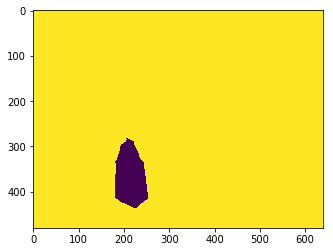

In [54]:
plt.imshow(area_mask)

In [79]:
sample ="15workers_rand0"
objid=11
tiles = pkl.load(open("../../crowd-seg/analysis/TileEM/pixel_em/{}/obj{}/tiles.pkl".format(sample,objid)))
mega_mask = get_mega_mask(sample, objid)
area_mask = np.zeros_like(mega_mask)
for tidx,t in enumerate(tiles):
    for txy in t:
        area_mask[txy]=tarea[tidx]

In [80]:
np.where(tiles!=0)

(array([0]),)

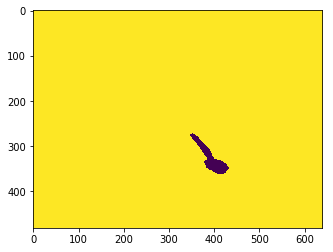

In [81]:
plt.imshow(area_mask)

In [59]:
# from sample_worker_seeds import sample_specs
# sample_lst = sample_specs.keys()
# object_lst = [ 7, 8, 9, 10]
# for sample in tqdm(sample_specs.keys()):
#     for objid in object_lst:
#         tiles = pkl.load(open("pixel_em/{}/obj{}/tiles.pkl".format(sample,objid)))
#         print len(np.where(tarea!=1)[0])

  0%|          | 0/31 [00:00<?, ?it/s]

1
1
1


  3%|▎         | 1/31 [00:32<16:20,  0.03it/s]

1
1
1
1


  6%|▋         | 2/31 [01:05<15:43,  0.03it/s]

1
1
1
1


 10%|▉         | 3/31 [01:36<14:58,  0.03it/s]

1
1
1
1


 13%|█▎        | 4/31 [02:08<14:27,  0.03it/s]

1
1
1
1


 16%|█▌        | 5/31 [02:41<13:57,  0.03it/s]

1
1
1
1


 19%|█▉        | 6/31 [03:14<13:31,  0.03it/s]

1
1
1
1


 23%|██▎       | 7/31 [03:50<13:11,  0.03it/s]

1
1
1


KeyboardInterrupt: 

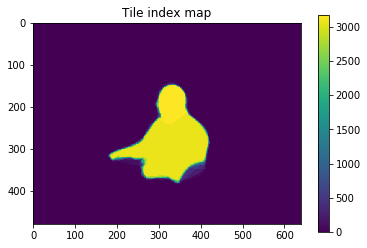

In [97]:
def tiles2AreaMask(sample,objid):
    tiles = pkl.load(open("pixel_em/{}/obj{}/tiles.pkl".format(sample,objid)))
    mega_mask = pkl.load(open("pixel_em/{}/obj{}/mega_mask.pkl".format(sample,objid)))
    tarea = [len(t) for t in tiles]
    mask = np.zeros_like(mega_mask)
    for tidx in range(len(tiles)):
        for i in list(tiles[tidx]):
            mask[i]=tarea[tidx]
    return mask

mask = tiles2mask("25workers_rand0",1)

plt.figure()
plt.imshow(mask)
plt.title("Tile index map")
plt.colorbar()